In machine learning, imbalanced data refers to a dataset where the distribution of classes is uneven, meaning one class (majority class) has significantly more samples than the other class(es) (minority class).

For example, consider the following two binary classification problems:
- Fraud Detection: 98% of transactions are legitimate (majority), 2% are fraudulent (minority).
- Disease Diagnosis: 95% of patients are healthy (majority), 5% have a rare disease (minority).

Imbalance can also occur in multi-class classification, if certain classes have far fewer samples than others.

The purpose of this notebook is to practice learning a model in the context of imbalanced data.

**Credits** - This notebook is adapted from another one produced by Damini Dasgupta. See her presentation at https://www.youtube.com/watch?v=tm7PoOnQ5HU&t=2612s.

# Importing packages

In [521]:
#pip install xgboost

In [522]:
import numpy as np #python library for working with arrays
import pandas as pd # for working with datasets

#Graphs
import matplotlib.pyplot as plt #visualization
from matplotlib import pyplot #visualization 
%matplotlib inline 
#static images of your plot embedded in the workbook

#For splitting the train and test data
from sklearn.model_selection import train_test_split

#For Sampling
from sklearn.utils import resample

#XGBoost Algorithm
import xgboost as xgb

#Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [523]:
pd.options.display.max_colwidth = 150 #to extend the maximum width of the output display

# Basic Exploratory Data Analysis

In [524]:
data = pd.read_csv('../data/aug_train.csv')

In [525]:
data.shape

(382154, 12)

In [526]:
data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23,0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209,0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51,0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262,0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217,1


In [527]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [528]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Premium'}>],
       [<Axes: title={'center': 'Policy_Sales_Channel'}>,
        <Axes: title={'center': 'Vintage'}>]], dtype=object)

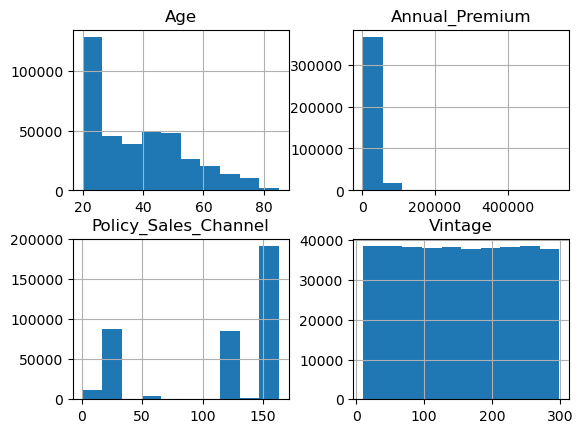

In [568]:
data[['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']].hist()

In [529]:
data.isnull().sum().sum() #checking for null values

0

In [530]:
data.dtypes #checking the data types of the various columns

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [531]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [532]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [533]:
data.Vehicle_Age.unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [534]:
data.Vehicle_Damage.unique()

array(['No', 'Yes'], dtype=object)

The `Response` (binary target) is highly imbalanced, as we can see in the plot below.

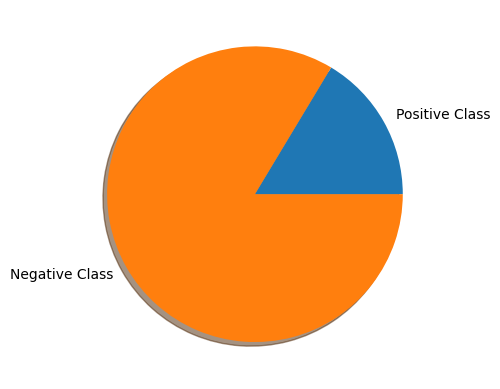

In [535]:
class_division = [ data[data['Response'] == 1 ].shape[0], data[data['Response'] == 0 ].shape[0] ]
my_labels = ['Positive Class', 'Negative Class']

plt.pie(class_division, labels = my_labels, shadow = True)
plt.show()

In [536]:
print("Proportion of Positive Class: " + str(round(data[data['Response'] == 1 ].shape[0]/data.shape[0] * 100, 2)) + "%")

Proportion of Positive Class: 16.38%


# Basic Data Preprocessing

In [537]:
data = pd.get_dummies(data, ['Gender', 'Vehicle_Age', 'Vehicle_Damage'], drop_first=True) #one-hot-encoding for Categorical Columns

In [538]:
data.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,167647,22,1,7.0,1,2630.0,152.0,16,0,True,True,False,False
1,17163,42,1,28.0,0,43327.0,26.0,135,0,True,False,False,True
2,32023,66,1,33.0,0,35841.0,124.0,253,0,False,False,False,True
3,87447,22,1,33.0,0,27645.0,152.0,69,0,False,True,False,False
4,501933,28,1,46.0,1,29023.0,152.0,211,0,True,True,False,False


# Building the X and y matrices

In [539]:
# Drop columns not to be used as features
X = data.drop(columns= ['id', 'Response']) 

X.columns = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Gender_Male', 'Vehicle_Age_lessthan_1_Year',
       'Vehicle_Age_greaterthan_2_Years', 'Vehicle_Damage_Yes']

# Defining the Response variable as the target.
y = data['Response']

# Train/val/test split

In a machine learning pipeline, it is usual to split the original data into three subsets:

- Training Set: Used to train the model by optimizing its parameters.
- Validation Set: Used to validate choices during model development. The validation set is used to fine-tune the model’s hyperparameters and make eventual architectural choices. It acts as an intermediate evaluation set, separate from both the training set and the test set.
- Test Set: Used only for final performance evaluation, ensuring no overfitting to the data used to build the model.

The code below splits the original dataset into train, validation and test datasets. Note that here, we have used `stratify = y`, so that the class imbalance is properly replicated after splitting. The data is split in a 70-30 ratio of dev:test. After that, we again use the 70-30 ratio in train:val.

In [540]:
from sklearn.model_selection import train_test_split #splitting the data into train and test

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

In [541]:
print("Proportion of positive class in original set: " + str(round(y.sum()/len(y) * 100, 2)) + "%")
print("Proportion of positive class in train set: " + str(round(y_train.sum()/len(y_train) * 100, 2)) + "%")
print("Proportion of positive class in val set: " + str(round(y_val.sum()/len(y_val) * 100, 2)) + "%")
print("Proportion of positive class in test set: " + str(round(y_test.sum()/len(y_test) * 100, 2)) + "%")

Proportion of positive class in original set: 16.38%
Proportion of positive class in train set: 16.38%
Proportion of positive class in val set: 16.38%
Proportion of positive class in test set: 16.38%


# Building a Basic XGBoost Model

The given Python code snippet initializes and trains a basic binary classifier using the XGBClassifier class from the XGBoost library.

In [542]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [543]:
y_pred_basic = xgb_classifier.predict(X_test)

In [544]:
print("Accuracy of Test Set:", round(accuracy_score(y_test, y_pred_basic) * 100, 2 ), "%")

Accuracy of Test Set: 84.51 %


In [545]:
def plot_confusion_matrix(y_test, y_pred):
    #Confusion metrics of the model built on down-sampled data
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

def compute_performance_metrics(y_test, y_pred):
    precision =  round(precision_score(y_test, y_pred), 4)
    recall = round(recall_score(y_test, y_pred), 4)
    F1 =  round(f1_score(y_test, y_pred), 4)
    metrics = [precision, recall, F1]
    return metrics

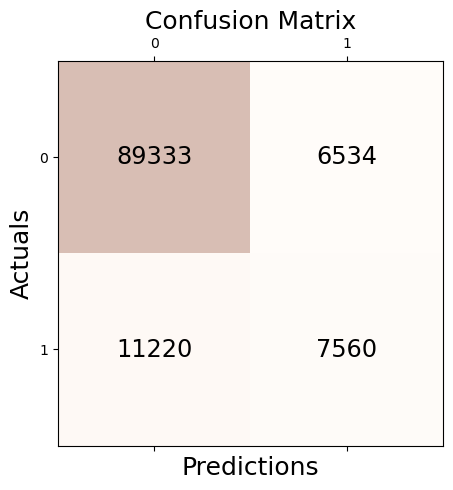

,Basic Model,Comments
Precision,0.5364,Only 54% of the customers targetted are actually interested in renewing their insurance
Recall,0.4026,Only 41% of the potentially interested customers are being identified
F1_score,0.4599,


In [546]:
plot_confusion_matrix(y_test, y_pred_basic)

metrics_basic = compute_performance_metrics(y_test, y_pred_basic)

original = pd.DataFrame(metrics_basic)
original.index = ['Precision', 'Recall', 'F1_score']
original.columns = ['Basic Model']
original['Comments'] = ['Only 54% of the customers targetted are actually interested in renewing their insurance',
                       'Only 41% of the potentially interested customers are being identified',
                       '']
original

# Dealing with class imbalance

In a machine learning pipeline, the activity of dealing with class imbalance refers to techniques used to address the issue where one class has significantly more samples than another. This is crucial because imbalanced datasets can lead to biased models that favor the majority class, reducing the model’s ability to correctly predict minority class instances.

## Adjusting the classification threshold

In models that output probabilities (e.g., logistic regression, neural networks, XGBoost), a default threshold of 0.5 is used for classification. In imbalanced datasets, the minority class has fewer samples, so using the default 0.5 threshold often leads to poor recall (i.e., many false negatives).

In a machine learning pipeline, adjusting the classification threshold is a simple yet powerful method to mitigate class imbalance without altering the dataset or retraining the model. The key is to choose a threshold that optimizes the trade-off between precision and recall, depending on the problem at hand. 

In [547]:
cols = ['Metrics', 'Original']
adj_threshold = pd.DataFrame()
adj_threshold['Original'] = metrics_basic
thresholds = [ j/20 for j in range(1,16)]

for i in thresholds:
    y_pred_new_threshold = (xgb_classifier.predict_proba(X_val)[:,1]>=i).astype(int) #calculating the threshold with respect to class 1

    precision_adj_threshold =  round(precision_score(y_val, y_pred_new_threshold, average='binary'), 4)
    recall_adj_threshold = round(recall_score(y_val, y_pred_new_threshold, average='binary'), 4)
    F1_score_adj_threshold =  round((f1_score(y_val, y_pred_new_threshold, average='binary')), 4)
    metrics_adj_threshold = [precision_adj_threshold, recall_adj_threshold, F1_score_adj_threshold]
    name = 'Threshold: ' + str(i) 
    adj_threshold[name] = metrics_adj_threshold
    cols.append(name)


adj_threshold.index = ['Precision', 'Recall', 'F1_score']
adj_threshold = adj_threshold.reset_index()
adj_threshold.columns = cols
adj_threshold.transpose()

adj_threshold1 = adj_threshold.transpose().iloc[1:, :]
adj_threshold1.columns = adj_threshold.iloc[:,0]
adj_threshold1

Metrics,Precision,Recall,F1_score
Original,0.5364,0.4026,0.4599
Threshold: 0.05,0.3553,0.987,0.5225
Threshold: 0.1,0.3846,0.9592,0.5491
Threshold: 0.15,0.4186,0.9255,0.5764
Threshold: 0.2,0.4459,0.8928,0.5947
Threshold: 0.25,0.4658,0.8526,0.6025
Threshold: 0.3,0.483,0.8122,0.6058
Threshold: 0.35,0.4972,0.7688,0.6039
Threshold: 0.4,0.5115,0.7066,0.5934
Threshold: 0.45,0.5226,0.5895,0.554


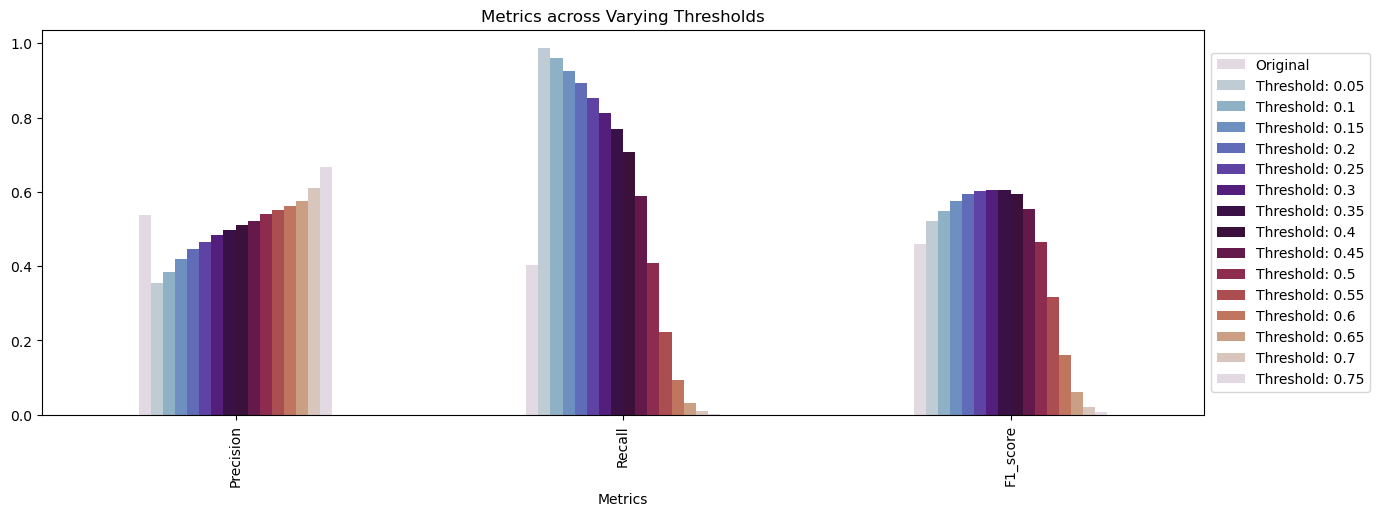

In [548]:
adj_threshold.plot(x='Metrics',
        kind='bar',
        stacked=False,
        title='Metrics across Varying Thresholds',
        figsize=(15, 5),
        cmap = 'twilight').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

Now we can build a new classifier with optimal threshold. See the code below.

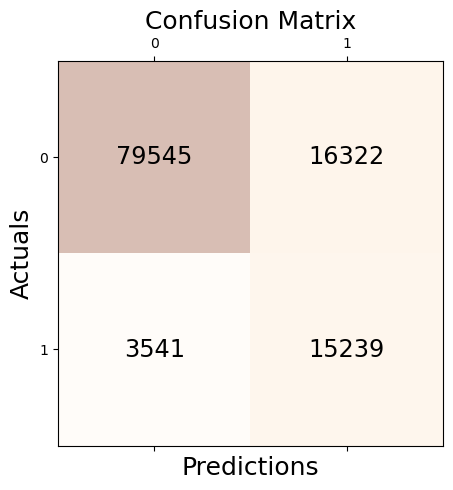

,Basic Model,Threshold = 0.3
Precision,0.5364,0.4828
Recall,0.4026,0.8114
F1_score,0.4599,0.6054


In [549]:
optimal_threshold = 0.3
y_pred_new_threshold = (xgb_classifier.predict_proba(X_test)[:,1]>=optimal_threshold).astype(int)

plot_confusion_matrix(y_test, y_pred_new_threshold)

metrics_changedthreshold = compute_performance_metrics(y_test, y_pred_new_threshold)

changedthreshold = pd.DataFrame(list(zip(metrics_basic, metrics_changedthreshold)))
changedthreshold.index = ['Precision', 'Recall', 'F1_score']
changedthreshold.columns = ['Basic Model', 'Threshold = 0.3']
changedthreshold

## Oversampling  (Increase Minority Class Instances)

In [550]:
# Oversampling
train_data=pd.concat([X_train,y_train],axis=1)

Response_Zero=train_data[train_data.Response==0]
Response_One=train_data[train_data.Response==1]

upsampled_One = resample(Response_One,
                          replace=True, # sample with replacement
                          n_samples=len(Response_Zero), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([Response_Zero, upsampled_One])

In [551]:
# Distribution of data in the train set before over-sampling
y_train.value_counts()

Response
0    156579
1     30675
Name: count, dtype: int64

In [552]:
# Distribution of data in the train set after over-sampling
upsampled['Response'].value_counts()

Response
0    156579
1    156579
Name: count, dtype: int64

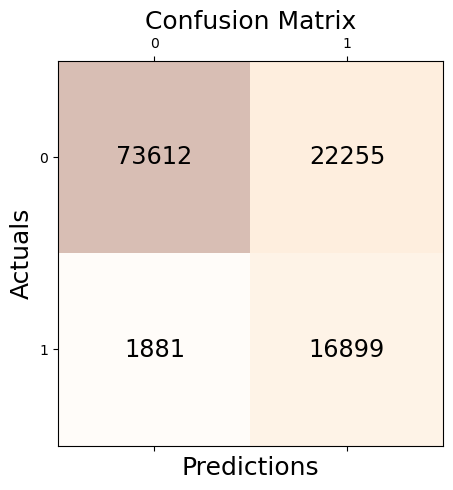

,Basic Model,Threshold = 0.3,Upsampled Dataset
Precision,0.5364,0.4828,0.4316
Recall,0.4026,0.8114,0.8998
F1_score,0.4599,0.6054,0.5834


In [553]:
# Training the model on up-sampled data
X_train_upsampled = upsampled.drop(columns = ['Response'])
y_train_upsampled = upsampled['Response']

xgb_upsampled = xgb.XGBClassifier()

xgb_upsampled.fit(X_train_upsampled,y_train_upsampled)

train_upsampled = xgb_upsampled.predict(X_train_upsampled)
y_pred_upsampled = xgb_upsampled.predict(X_test)

plot_confusion_matrix(y_test, y_pred_upsampled)

metrics_upsampled = compute_performance_metrics(y_test, y_pred_upsampled)

upsampled = pd.DataFrame(list(zip(metrics_basic, metrics_changedthreshold, metrics_upsampled)))
upsampled.index = ['Precision', 'Recall', 'F1_score']
upsampled.columns = ['Basic Model', 'Threshold = 0.3', 'Upsampled Dataset']
upsampled

## Undersampling (Reduce Majority Class Instances)

In [554]:
#down-sampling
downsampled_Zero = resample(Response_Zero,
                                replace = False, # sample without replacement
                                n_samples = len(Response_One), # match minority n
                                random_state = 27) # reproducible results

#combine minority and downsampled majority
downsampled = pd.concat([downsampled_Zero, Response_One])

In [555]:
#Distribution of majority and minority classes 
y_train.value_counts()

Response
0    156579
1     30675
Name: count, dtype: int64

In [556]:
#Distribution of both the classes after down-sampling
downsampled['Response'].value_counts()

Response
0    30675
1    30675
Name: count, dtype: int64

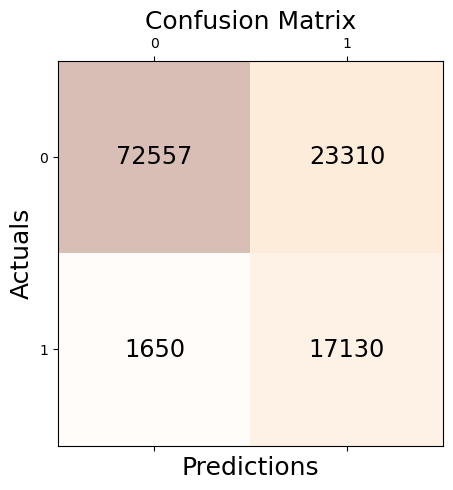

,Basic Model,Threshold = 0.3,Upsampled Dataset,Downsampled Dataset
Precision,0.5364,0.4828,0.4316,0.4236
Recall,0.4026,0.8114,0.8998,0.9121
F1_score,0.4599,0.6054,0.5834,0.5785


In [557]:
#Training the model on down-sampled data and testing on the original test dataset
X_train_downsampled = downsampled.drop(columns = ['Response'])
y_train_downsampled = downsampled['Response']

xgb_downsampled = xgb.XGBClassifier()

xgb_downsampled.fit(X_train_downsampled,y_train_downsampled)

train_downsampled = xgb_downsampled.predict(X_train_downsampled)
y_pred_downsampled = xgb_downsampled.predict(X_test)

plot_confusion_matrix(y_test, y_pred_downsampled)

metrics_downsampled = compute_performance_metrics(y_test, y_pred_downsampled)

downsampled = pd.DataFrame(list(zip(metrics_basic, metrics_changedthreshold,  metrics_upsampled, metrics_downsampled)))
downsampled.index = ['Precision', 'Recall', 'F1_score']
downsampled.columns = ['Basic Model', 'Threshold = 0.3', 'Upsampled Dataset', 'Downsampled Dataset']
downsampled

## imblearn library

The [imbalanced-learn library](https://imbalanced-learn.org/stable/) (often abbreviated as imblearn) is a Python library designed to address the challenges posed by imbalanced datasets in machine learning. An imbalanced dataset occurs when the distribution of classes is not uniform, with one class having significantly fewer instances than another. This imbalance can lead to biased model performance, especially in binary classification problems.

The imbalanced-learn library provides a variety of techniques for handling class imbalance, including:

1. **Oversampling Methods:**. Generating synthetic examples of the minority class to balance class distribution. Examples include SMOTE (Synthetic Minority Over-sampling Technique) and ADASYN (Adaptive Synthetic Sampling).

2. **Undersampling Methods:**. Reducing the number of examples from the majority class to balance the distribution. Examples include RandomUnderSampler and TomekLinks.

3. **Combination Methods:**. Combining oversampling and undersampling strategies. Examples include SMOTEENN and SMOTETomek.

4. **Weighting Methods:**. Assigning different weights to classes during training to give more importance to the minority class. Examples include the inverse class frequency approach and custom weight approach.

imbalanced-learn is an extension of the scikit-learn library and can be easily integrated with other machine learning methods available in scikit-learn.

To use imbalanced-learn, you can install it using the following command:

```bash
pip install -U imbalanced-learn
```

Once installed, you can import its functions and classes into your Python script to implement class balancing techniques on imbalanced datasets.

In [558]:
# pip install -U imbalanced-learn

## SMOTE

SMOTE, which stands for Synthetic Minority Over-sampling Technique, is a technique used to address class imbalance in machine learning datasets. It works by generating synthetic examples of the minority class to balance the class distribution. SMOTE helps address the issue of imbalanced datasets by creating new synthetic instances rather than replicating existing ones. This helps prevent overfitting on the minority class and can improve the performance of machine learning models.

Steps of the SMOTE technique:

1. **Identify Minority Class Instances**. SMOTE focuses on the minority class, which is the class with fewer instances.

2. **Select a Minority Instance**. For each instance in the minority class, SMOTE selects a data point.

3. **Identify k Nearest Neighbors:**. SMOTE then identifies the k nearest neighbors of the selected instance. The value of k is a parameter specified by the user.

4. **Generate Synthetic Examples**. For the selected instance, SMOTE generates synthetic examples by interpolating between the selected instance and its k nearest neighbors. The interpolation is done by taking the difference between feature values of the selected instance and each neighbor and multiplying it by a random number between 0 and 1. The result is added to the selected instance to create a synthetic example.

5. **Repeat for Other Instances**. Steps 2-4 are repeated for all instances in the minority class.

6. **Incorporate Synthetic Examples.**. The synthetic examples are incorporated into the dataset, increasing the representation of the minority class.


Regarding step 4 above, the mathematical formulation is given by the following expression:

 $$
 x_{new} = x_i + \lambda \times (x_{zi} - x_i)
 $$

In the above expression, $\lambda$ is a random number in the range $[0,1]$. This interpolation will create a sample on the line between 
$x_i$ and $x_{zi}$. The following image gives an intuition about how SMOTE does such interpolation to generation synthetic examples.

<p align="center">
<img src="https://imbalanced-learn.org/stable/_images/sphx_glr_plot_illustration_generation_sample_001.png" alt="drawing" width="400"/>
</p>

In [559]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote_oversample = SMOTE()

In [560]:
X_train_smote, y_train_smote = smote_oversample.fit_resample(X_train, y_train)

In [561]:
from collections import Counter

# summarize the new class distribution
counter = Counter(y_train_smote)
print(counter)

Counter({0: 156579, 1: 156579})


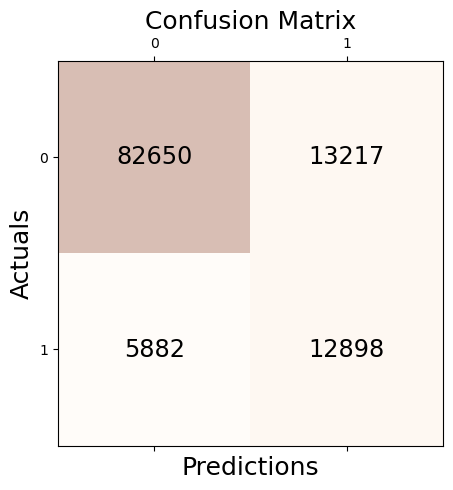

,Basic Model,Threshold = 0.3,Upsampled Dataset,Downsampled Dataset,SMOTE upsampled
Precision,0.5364,0.4828,0.4316,0.4236,0.4939
Recall,0.4026,0.8114,0.8998,0.9121,0.6868
F1_score,0.4599,0.6054,0.5834,0.5785,0.5746


In [562]:
#Training the model on SMOTE p-sampled data and testing on the original test dataset

xgb_smote = xgb.XGBClassifier()

xgb_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = xgb_smote.predict(X_test)

plot_confusion_matrix(y_test, y_pred_smote)

metrics_smote = compute_performance_metrics(y_test, y_pred_smote)

results = pd.DataFrame(list(zip(metrics_basic, metrics_changedthreshold,  metrics_upsampled, metrics_downsampled, metrics_smote)))
results.index = ['Precision', 'Recall', 'F1_score']
results.columns = ['Basic Model', 'Threshold = 0.3', 'Upsampled Dataset', 'Downsampled Dataset', 'SMOTE upsampled']
results

## Weighted Model

In learning algorithms that work by optimizing a loss function, if the dataset is imbalanced, the majority class dominates the loss function, making it harder for the model to learn patterns in the minority class. In this situation, it is possible to adjust the **weight** of the positive class (i.e., the minority class) in the loss function.

In the case of `xgb.XGBClassifier`, setting the value of the hyperparameter `scale_pos_weight` is a simple and effective way to handle imbalanced datasets without resampling. It ensures the minority class is given more importance in the learning process, improving model performance on underrepresented instances.

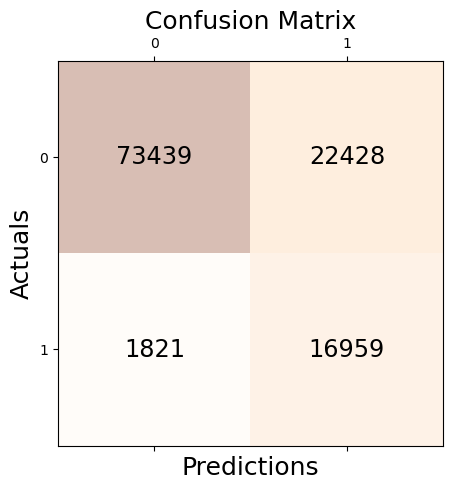

,Basic Model,Threshold = 0.3,Upsampled Dataset,Downsampled Dataset,SMOTE upsampled,Weighted
Precision,0.5364,0.4828,0.4316,0.4236,0.4939,0.4306
Recall,0.4026,0.8114,0.8998,0.9121,0.6868,0.9030
F1_score,0.4599,0.6054,0.5834,0.5785,0.5746,0.5831


In [563]:
xgb_weighted = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]))

xgb_weighted.fit(X_train, y_train)

y_pred_weighted = xgb_weighted.predict(X_test)

plot_confusion_matrix(y_test, y_pred_weighted)

metrics_weighted = compute_performance_metrics(y_test, y_pred_weighted)
results = pd.DataFrame(list(zip(metrics_basic, metrics_changedthreshold,  metrics_upsampled, metrics_downsampled, metrics_smote, metrics_weighted)))
results.index = ['Precision', 'Recall', 'F1_score']
results.columns = ['Basic Model', 'Threshold = 0.3', 'Upsampled Dataset', 'Downsampled Dataset', 'SMOTE upsampled', 'Weighted']
results